In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [2]:
insurance_data = 'Data/insurance - insurance.csv'
ins_df = pd.read_csv(insurance_data)
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Answering the following questions using hypothesis testing.

Do smokers have higher insurance charges than non-smokers?

Are men more likely to smoke than women?

Do different regions have different charges, on average?

# Do smokers have higher insurance charges than non-smokers?

Null Hypothesis - Smoker and non-smokers are not charged differently for insurance.

Alternate Hypothesis - Smokers have higher insurance charges than non-smokers.


Data is: Numeric

Number of samples: Two; Smokers and Non-Smokers

Therefore, the appropriate test is: 2 Sample T Test


The target column is: charges

The column that determines our groups: smoker

In [4]:
ins_df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [5]:
ins_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [6]:
ins_df['a_smoker'] = ins_df['smoker'].str.contains('yes')
ins_df['a_smoker'].value_counts(normalize=True)

False    0.795217
True     0.204783
Name: a_smoker, dtype: float64

In [7]:
needed_cols = ['a_smoker','charges']

In [8]:
non_smoker = ins_df.loc[ins_df['a_smoker'] == False, needed_cols]
non_smoker

,a_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [9]:
smoker = ins_df.loc[ins_df['a_smoker'] == True, needed_cols]
smoker

,a_smoker,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [10]:
plot = pd.concat([non_smoker,smoker])
plot

,a_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


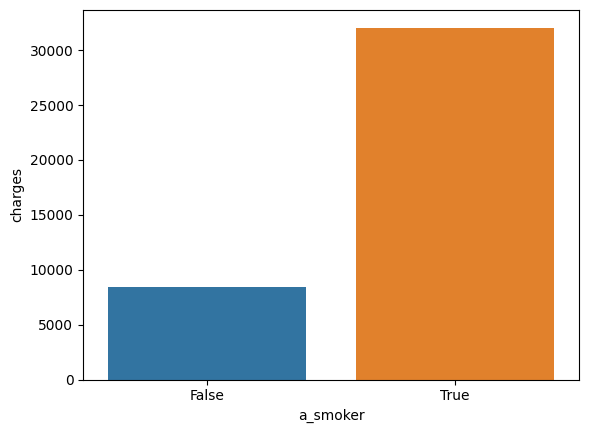

In [11]:
sns.barplot(data=plot, x = 'a_smoker', y = 'charges', ci = None);

Testing Assumptions
- No significant outliers
- Normality
- Equal Variance

In [12]:
smoker_group = smoker['a_smoker']
non_smoker_group = non_smoker['a_smoker']
non_smoker_group

1       False
2       False
3       False
4       False
5       False
        ...  
1332    False
1333    False
1334    False
1335    False
1336    False
Name: a_smoker, Length: 1064, dtype: bool

In [13]:
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3

smoker_outliers.value_counts()

#for outliers use smoker_group = smoker_group[~smoker_outliers] 

False    274
Name: a_smoker, dtype: int64

In [14]:
non_smoker_outliers = np.abs(stats.zscore(non_smoker_group)) > 3

non_smoker_outliers.value_counts()

False    1064
Name: a_smoker, dtype: int64

In [15]:
results = stats.normaltest(smoker_group)
results

NormaltestResult(statistic=912.5320002311742, pvalue=7.017684990573959e-199)

In [16]:
len(smoker_group)

274

In [17]:
results2 = stats.normaltest(non_smoker_group)
results2

NormaltestResult(statistic=2864.2063762353473, pvalue=0.0)

In [18]:
len(non_smoker_group)

1064

Because the length of both groups is less than 20, we have passed the assumption of normality.

In [23]:
res = stats.levene(smoker_group,non_smoker_group)
res

LeveneResult(statistic=nan, pvalue=nan)

We did not pass the assumption.